In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, RocCurveDisplay, roc_curve

# Wczytanie danych
data = load_breast_cancer()
y = data.target
X = data.data

Liczba wszystkich przypadków: 569
Liczba przypadków raka złośliwego: 357


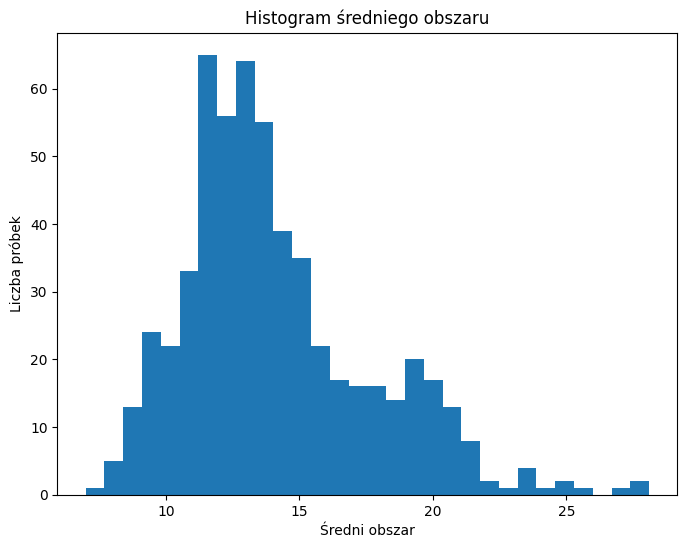

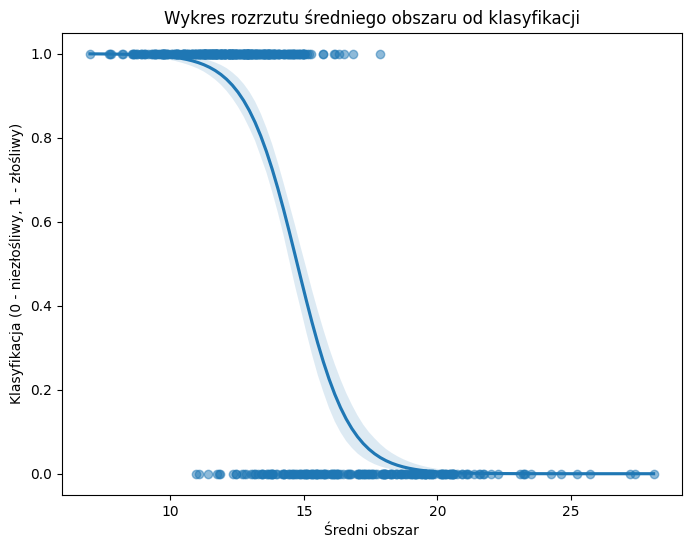

In [5]:
# 1. Sprawdź liczbę wszystkich przypadków
print(f"Liczba wszystkich przypadków: {len(y)}")

# 2. Sprawdź liczbę przypadków raka złośliwego
malignant_count = np.sum(y == 1)
print(f"Liczba przypadków raka złośliwego: {malignant_count}")

# 3. Narysuj histogram średniego obszaru (mean area)
mean_area = X[:, 0]
plt.figure(figsize=(8, 6))
plt.hist(mean_area, bins=30)
plt.xlabel("Średni obszar")
plt.ylabel("Liczba próbek")
plt.title("Histogram średniego obszaru")
plt.show()

# 4. Narysuj wykres rozrzutu (scatterplot) średniego obszaru od klasyfikacji
plt.figure(figsize=(8, 6))
sns.regplot(x=mean_area, y=y, logistic=True, scatter_kws={'alpha': 0.5})
plt.xlabel("Średni obszar")
plt.ylabel("Klasyfikacja (0 - niezłośliwy, 1 - złośliwy)")
plt.title("Wykres rozrzutu średniego obszaru od klasyfikacji")
plt.show()

zadanie
from sklearn.linear_model import LogisticRegression
Zbuduj model regresji logistycznej
1. Sprawdź, jeśli dane nie są ustandaryzowane zrób to
2. Podziel zbiór danych na testowy (30%) i uczący (70%)
3. Zwizualizuj wyniki używając:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import RocCurveDisplay, roc_curve

In [9]:
# 3. Sprawdź czy zmienna uzyskuje średnią wartość oczekiwaną zero i odchylenie standardowe jeden
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
mean = np.mean(X_scaled)
std = np.std(X_scaled)
print(f"Średnia wartość oczekiwana {mean} (powinna być bliska 0)")
print(f"Odchylenie standardowe: {std} (powinno być bliskie 1)")


Średnia wartość oczekiwana -6.118909323768877e-16 (powinna być bliska 0)
Odchylenie standardowe: 1.0 (powinno być bliskie 1)


In [15]:
# 4. Dzielimy dane na uczące i testowe
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
# Wyswietl rozmiary zbiorów i informacje o nowych zbiorach
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")



X_train shape: (398, 30)
X_test shape: (171, 30)
y_train shape: (398,)
y_test shape: (171,)


Accuracy: 0.9824561403508771


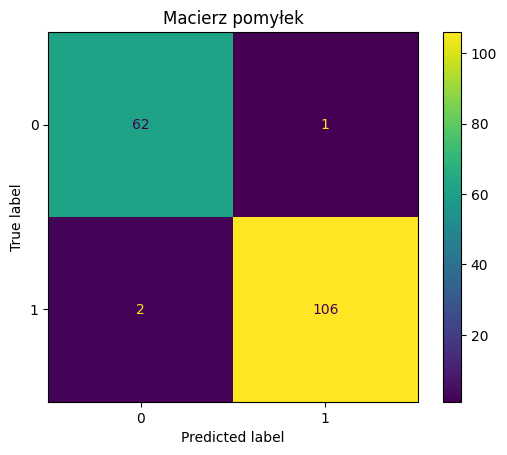

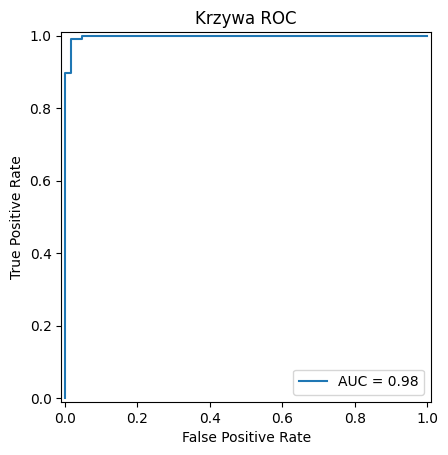

In [13]:
# 5. Budujemy model regresji logistycznej
model = LogisticRegression()
model.fit(X_train, y_train)

# 6. Ewaluujemy model
y_pred = model.predict(X_test)
print("Accuracy:", model.score(X_test, y_test))

# 7. Wizualizacja wyników
# Macierz pomyłek
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Macierz pomyłek")
plt.show()

# Krzywa ROC
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = model.score(X_test, y_test)
roc_disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
roc_disp.plot()
plt.title("Krzywa ROC")
plt.show()

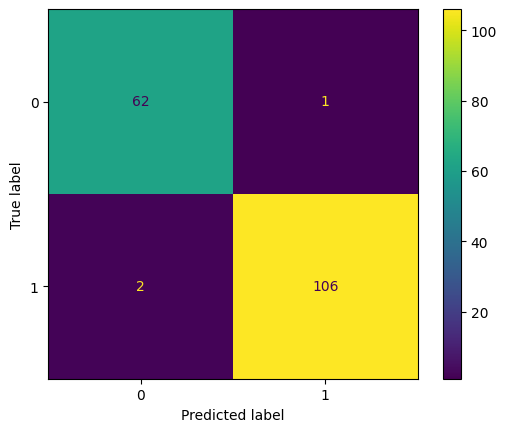

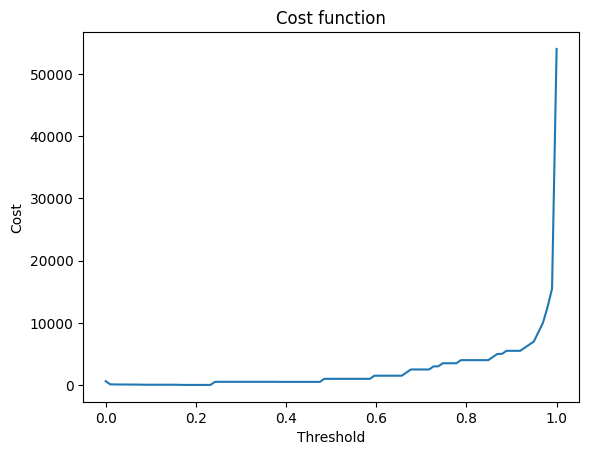

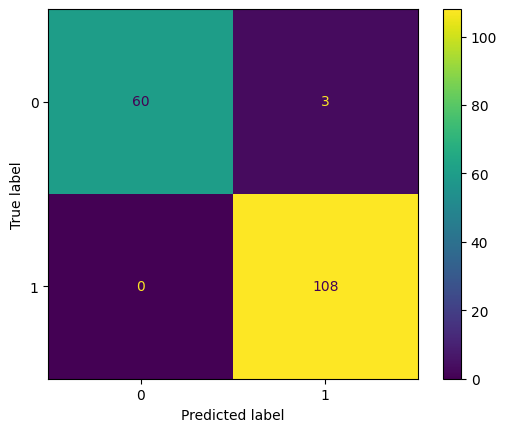

Best threshold: 0.17171717171717174


In [27]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
clf.fit(X_train, y_train)
coef = clf.coef_
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.show()

#optimize threshold with opperational research
thresholds = np.linspace(0,1,100)
costs = []
for threshold in thresholds:
    y_pred = (clf.predict_proba(X_test)[:,1] >= threshold).astype(int)
    cm = confusion_matrix(y_test, y_pred)
    cost = cm[0,1]*10 + cm[1,0]*500
    costs.append(cost)
plt.plot(thresholds, costs)
plt.xlabel("Threshold")
plt.ylabel("Cost")
plt.title("Cost function")
plt.show()
#choose the best threshold
best_threshold = thresholds[np.argmin(costs)]
y_pred = (clf.predict_proba(X_test)[:,1] >= best_threshold).astype(int)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.show()
print(f"Best threshold: {best_threshold}")





Accuracy: 0.9590643274853801


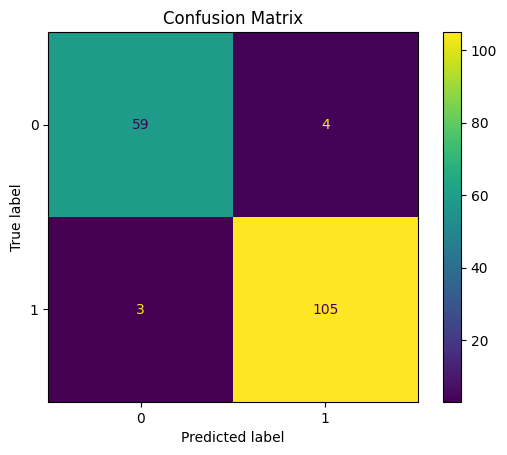

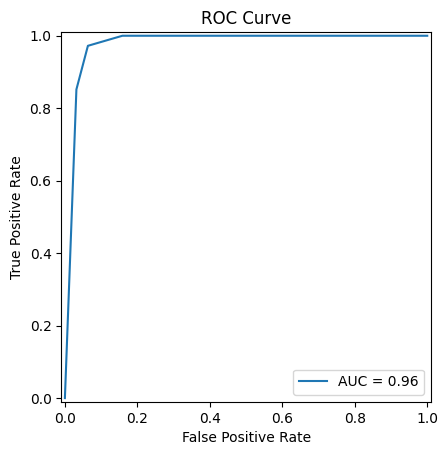

In [29]:
from sklearn.neighbors import KNeighborsClassifier


# Train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Evaluate the model
y_pred = knn.predict(X_test)
accuracy = knn.score(X_test, y_test)
print("Accuracy:", accuracy)

# Visualize the results
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:, 1])
roc_auc = knn.score(X_test, y_test)
roc_disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
roc_disp.plot()
plt.title("ROC Curve")
plt.show()